In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:07<00:00, 253MB/s]
100% 1.06G/1.06G [00:07<00:00, 160MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# Generators - Generators divide the data into batches
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# As the dataset is stored in the form of numpy array  as the every value of the numpy array is form 0 to 255 then we need to change the value from the 0-255 to 0-1
# then we need to Normalize it
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)


In [7]:
# creating a CNN model
# there are 3 contribution layers
model = Sequential()

# in first layers there are 32 filters

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# in first layers there are 64 filters

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# in first layers there are 128 filters

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 75s 104ms/step - loss: 1.1706 - accuracy: 0.6137 - val_loss: 0.8747 - val_accuracy: 0.5978
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5335 - accuracy: 0.7344 - val_loss: 0.4751 - val_accuracy: 0.7706
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4502 - accuracy: 0.7889 - val_loss: 0.6445 - val_accuracy: 0.6910
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3908 - accuracy: 0.8260 - val_loss: 0.4323 - val_accuracy: 0.8024
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3317 - accuracy: 0.8576 - val_loss: 1.4010 - val_accuracy: 0.5462
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2388 - accuracy: 0.9003 - val_loss: 1.8893 - val_accuracy: 0.5066
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1659 - accuracy: 0.9343 - val_loss: 0.5050 - val_ac

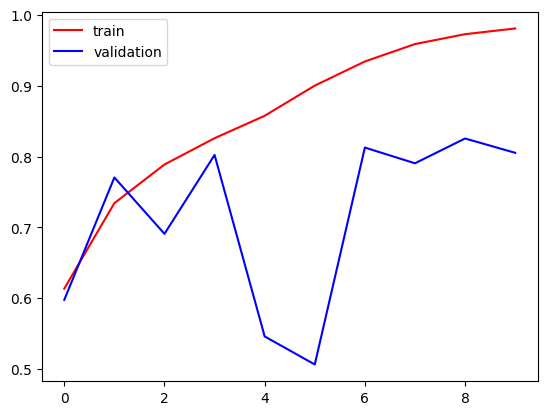

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


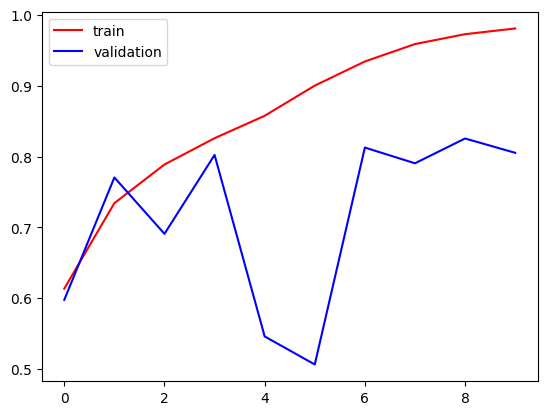

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


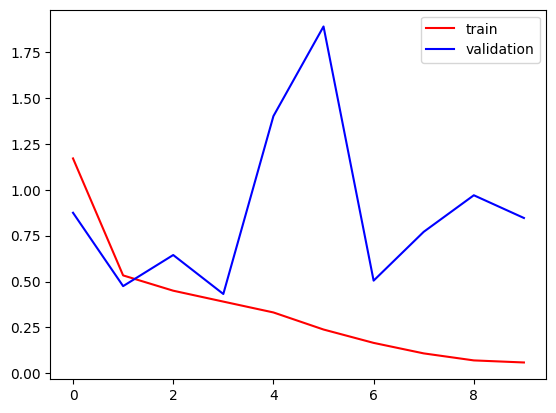

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

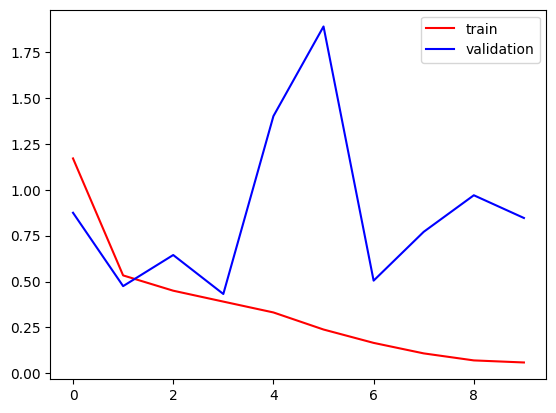

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [16]:
import cv2

In [31]:
test_img = cv2.imread('/content/cat.jpg')

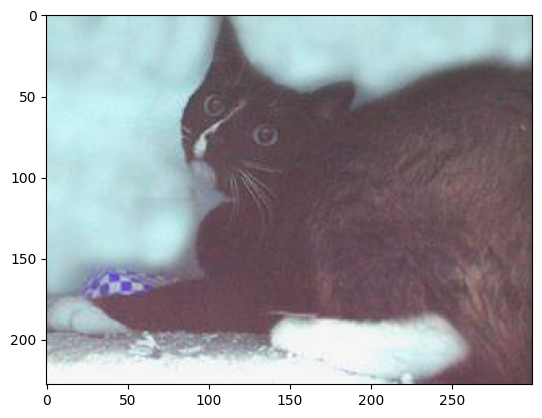

In [32]:
plt.imshow(test_img)

In [33]:
test_img.shape


(228, 300, 3)

In [34]:
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_input = test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)
# if the output is [1.] then it the image of the dog
# if the output is [0.] then it the image of the cat

1/1 [==============================] - 0s 432ms/step


array([[1.]], dtype=float32)